<a href="https://colab.research.google.com/github/rheannlv/MLA_RLV/blob/main/MLA2_RLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rheann Vera

Machine Learning Assignment 2

CS-430-ON

**Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

**Linear Regression - Acquire Data**

In [9]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [ ]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [11]:
df.rename(columns={'Usage_kWh':'useage_kwh', 'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh', 'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
                   'Lagging_Current_Power_Factor':'lag_current_pwr','Leading_Current_Power_Factor':'lead_current_pwr', 'NSM':'nsm', 'WeekStatus':'week_status', 'Day_of_week':'day_of_week', 'Load_Type':'load_type'},inplace=True)

**Statistics and Visual Exploration**

In [ ]:
df.describe()

,useage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [7]:
load_type = df['load_type'].groupby(df['load_type']).count()

In [8]:
load_type

load_type
Light_Load      18072
Maximum_Load     7272
Medium_Load      9696
Name: load_type, dtype: int64

In [9]:
load_type = pd.Series(load_type)

Text(0, 0.5, 'Number of days')

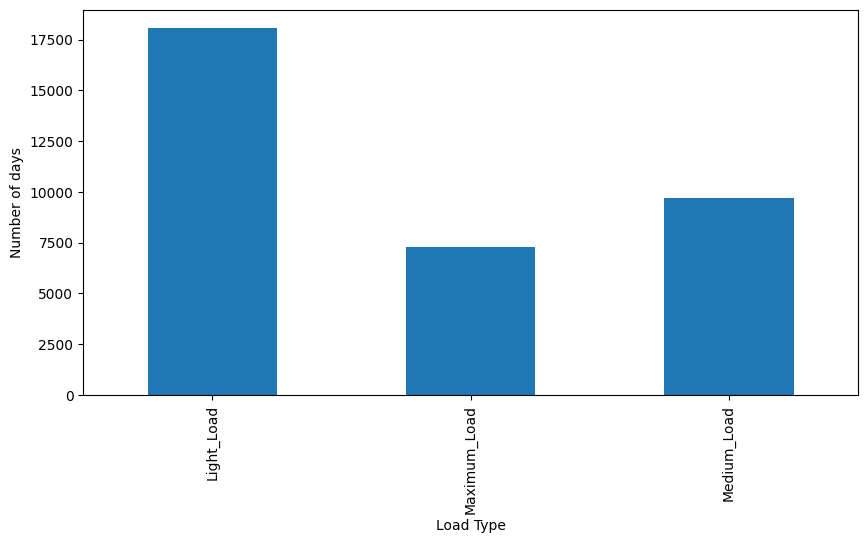

In [10]:
load_type.plot(kind='bar',figsize=(10,5))
plt.xlabel('Load Type')
plt.ylabel('Number of days')


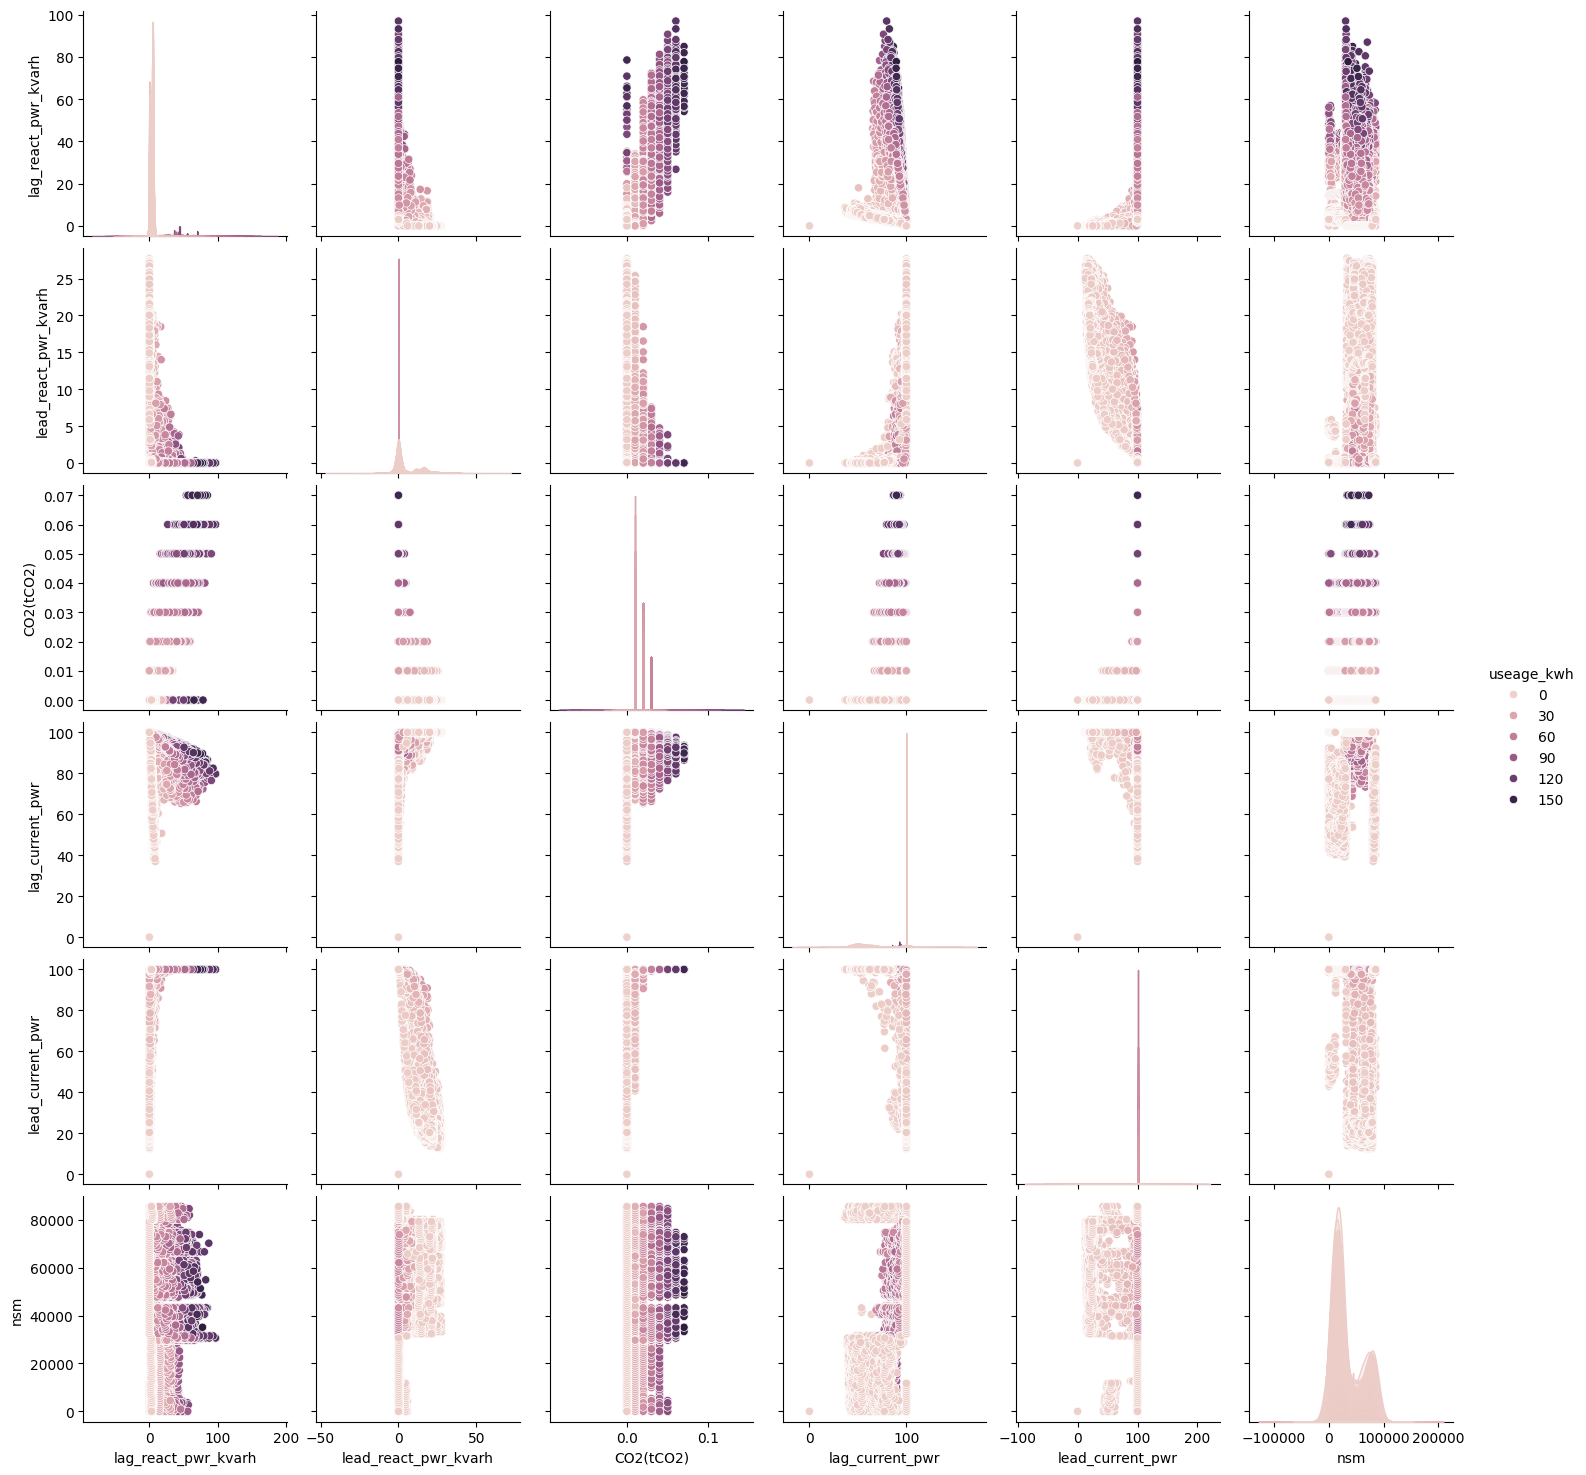

In [ ]:
sns.pairplot(df, diag_kind='kde', hue='useage_kwh')

*   useage_kwh is high in relation with lag_react_pwr_kvarh, and CO2 and vice versa with lead_react_pwr_kvarh shows lower useage_kwh and lower CO2. These values show the highest and lowest spikes in relation to useage_kwh.




**Splitting Data into Train/Test**

In [14]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type', 'CO2(tCO2)']]
y = df[['useage_kwh']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

**Building the Pipeline**

In [16]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

In [17]:
col_transform = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(), cat_attribs),
    ('num',MinMaxScaler(), num_attribs),
], remainder='passthrough')

In [18]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlr_model', LinearRegression())
])

In [19]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

**Executing the model**

In [20]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

**Evaluating the Model**

In [21]:
y_pred_test= pipeline.predict(X_test)

In [22]:
y_pred_train = pipeline.predict(X_train)

In [23]:
print(mean_squared_error(y_test, y_pred_test)**(0.5))
print(mean_squared_error(y_train, y_pred_train)**(0.5))

5.049590596342929
4.58316622126044


Both y_test (5.05) and y_train (4.58) RMSE are both low values indicating accurate predictions.

In [25]:
r2_score(y_pred_test,y_test)

0.976289382780047

The r2_score is higher than 0.9 indicating this is a good model.

In [26]:
pipeline.named_steps['mlr_model'].intercept_

array([3.44915748e+14])

In [27]:
pipeline.named_steps['mlr_model'].coef_

array([[-5.08872671e+13, -3.90983168e+13, -6.89619855e+13,
        -6.89619855e+13, -8.07509358e+13, -8.07509358e+13,
        -6.89619855e+13, -6.89619855e+13, -6.89619855e+13,
        -2.25066496e+14, -2.25066496e+14, -2.25066496e+14,
         2.90083845e+01,  1.91419272e+00,  1.17473851e+02,
         6.99739086e+00,  4.74945300e+00, -3.54024887e-01]])

Based on the evaluation values. Both RMSE for y_test and y_train were relatively low and the r2 score nearly 100% is another indicator that this is a good model of predicting kwh usage.  

**Logistic Regression - Acquire Data**

In [61]:
df['week_status'] = df['week_status'].apply(lambda x: 1 if x == "Weekday" else 0)

In [62]:
df.week_status.groupby(df.week_status).count()

week_status
0     9984
1    25056
Name: week_status, dtype: int64

**Splitting Data in to Train/Test**

In [63]:
X = df[['useage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'load_type']]
y = df[['week_status']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [65]:
df.head()

,date,useage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,Monday,Light_Load


In [66]:
df.dtypes

date                     object
useage_kwh              float64
lag_react_pwr_kvarh     float64
lead_react_pwr_kvarh    float64
CO2(tCO2)               float64
lag_current_pwr         float64
lead_current_pwr        float64
nsm                       int64
week_status               int64
day_of_week              object
load_type                object
dtype: object

**Building the Pipeline**

In [67]:
num_attribs_log = ['useage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs_log = ['load_type']

In [68]:
col_transform = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_attribs_log),
    ('num',MinMaxScaler(), num_attribs_log),
], remainder='passthrough')

In [69]:
pipeline_log = Pipeline([
    ('trans', col_transform),
    ('mlr', LogisticRegression(max_iter=1000))
])

In [70]:
from sklearn import set_config
set_config(display='diagram')
pipeline_log

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['useage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

**Executing the Model**

In [71]:
pipeline_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['useage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

**Evaluating the Model**

In [72]:
y_pred = pipeline_log.predict(X_test)

In [73]:
confusion_matrix(y_test, y_pred)

array([[ 573, 1413],
       [ 190, 4832]])

In [74]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

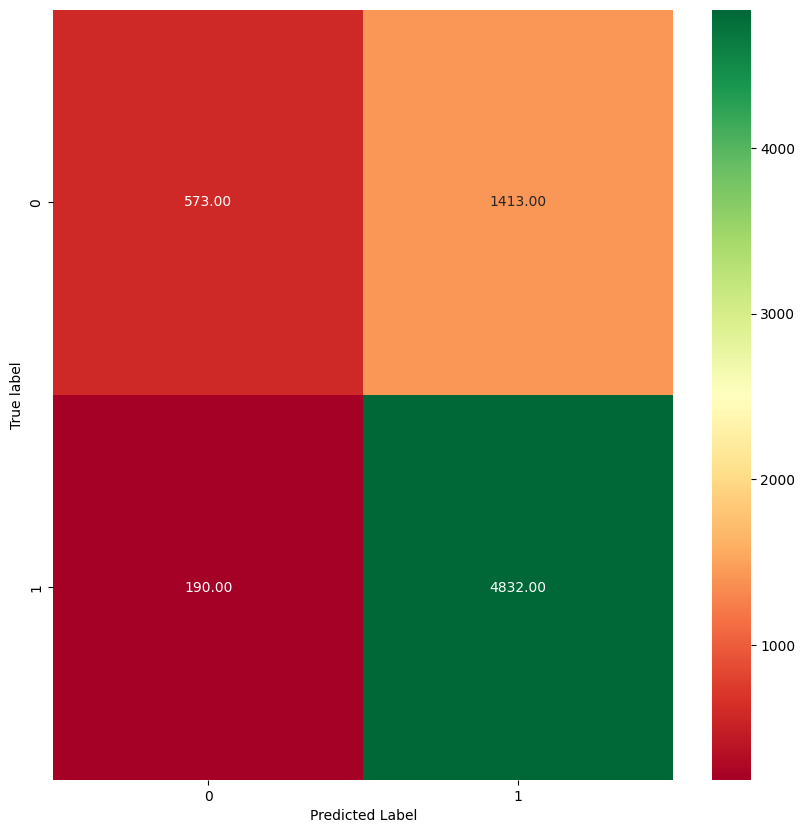

In [75]:
plot_cm(y_test,y_pred)

In [76]:
print('Precision: ', precision_score(y_test,y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1: ', f1_score(y_test,y_pred))

Precision:  0.7737389911929544
Recall:  0.9621664675428117
F1:  0.8577261027780244


* When it predicts a week_day status it's
correct 77% of the time.
* It predicts week_day status accurately identifing a week_day 96% of the time.
* The F1 score is 85%.


In [77]:
y_scores = pipeline_log.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_score = auc(recall, precision)

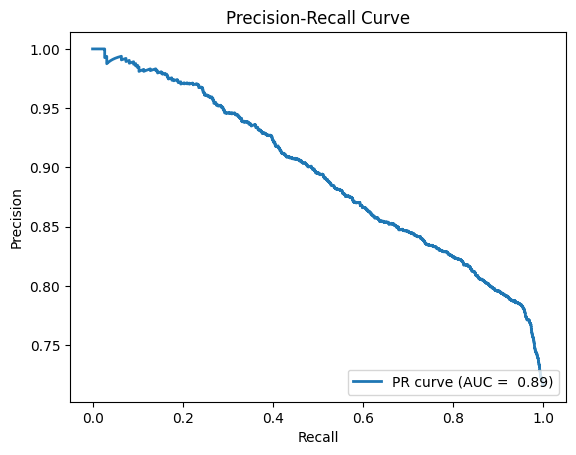

In [78]:
plt.plot(recall, precision, lw=2, label=f'PR curve (AUC = {auc_score: .2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

* I chose to plot a Precision-Recall curve to focus more on the positives of the data set. The values of the negatives are much lower than the positives and felt the ROC curve wouldn't be as accurate.



*  Based on the precision, recall and F1 score are relatively high indicating the model does well in predicting.